# MP3: Image Filtering

In this lab, you'll filter an image using weighted-average filters and edge-detection filters.

In order to make sure everything works, you might want to go to the command line, and run

    pip install -r requirements.txt
    
This will install the modules that are used on the autograder, including numpy, h5py, and the gradescope utilities.

In [1]:
import submitted
import importlib
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
import matplotlib.figure
%matplotlib inline

---------------------------------------------------------------------
## Part 0: Load the data, and show the image

In [2]:
imagefile = 'image.jpg'
original = np.asarray(Image.open(imagefile)).astype('float64')
print('The image size is:')
print(original.shape)

The image size is:
(600, 800, 3)


Text(0.5, 1.0, 'Here is the original image!')

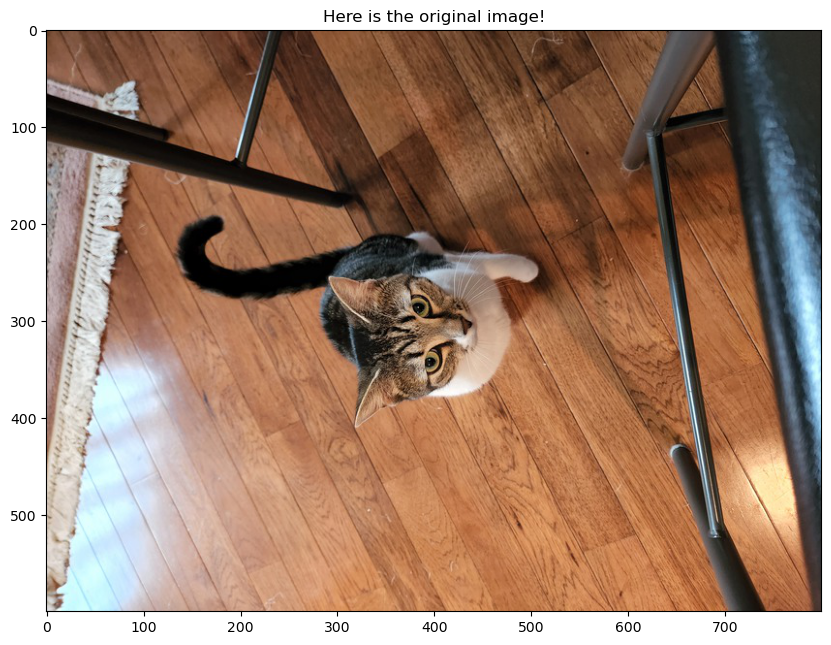

In [3]:
imagefile = 'image.jpg'
original = np.asarray(Image.open(imagefile)).astype('float64')
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
ax.imshow(original.astype(int))
ax.set_title('Here is the original image!')


Text(0.5, 1.0, 'Row 300 of the image, blue color plane')

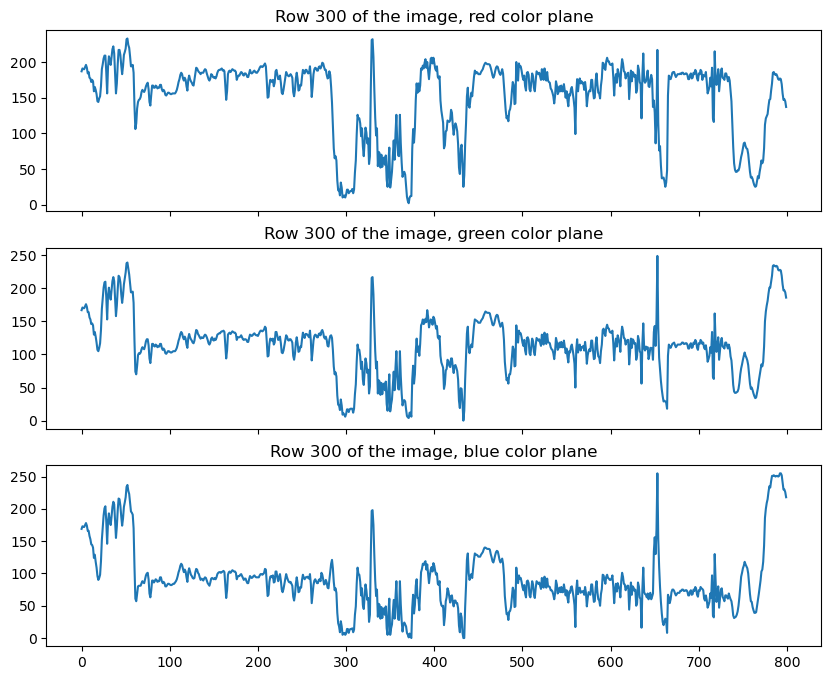

In [4]:
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(3,1,sharex=True)
axs[0].plot(original[300,:,0])
axs[0].set_title('Row 300 of the image, red color plane')
axs[1].plot(original[300,:,1])
axs[1].set_title('Row 300 of the image, green color plane')
axs[2].plot(original[300,:,2])
axs[2].set_title('Row 300 of the image, blue color plane')

## Part 1: Create a rectangular filter, and show it in a plot

In [5]:
importlib.reload(submitted)
help(submitted.todo_rectangular_filter)

Help on function todo_rectangular_filter in module submitted:

todo_rectangular_filter()
    Create 11 samples of a 7-sample rectangular filter,
    h[n]=1/7 for -3 <= n <= 3, h[n]=0 otherwise.
    Return 11 samples of both n_rect and h_rect.



Text(0.5, 1.0, 'Rectangular-smoothed Unit step')

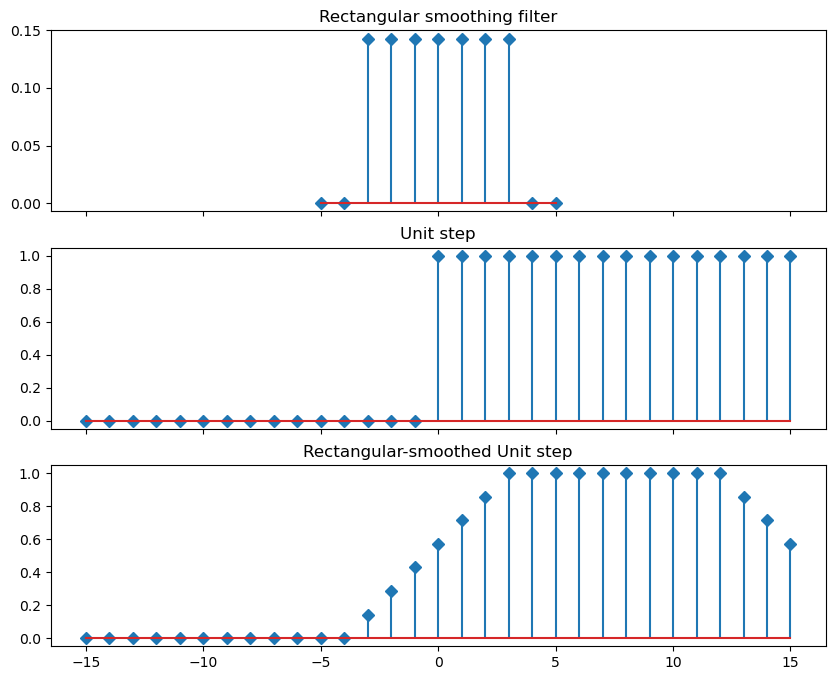

In [6]:
importlib.reload(submitted)
(n_rect, h_rect) = submitted.todo_rectangular_filter()
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(3,1,sharex=True)
axs[0].stem(n_rect, h_rect, markerfmt='D')
axs[0].set_title('Rectangular smoothing filter')
(n_step, x_step) = submitted.unit_step()
axs[1].stem(n_step, x_step, markerfmt='D')
axs[1].set_title('Unit step')
y_step = np.convolve(x_step, h_rect, mode='same')
axs[2].stem(n_step, y_step, markerfmt='D')
axs[2].set_title('Rectangular-smoothed Unit step')


## Part 2: Use h_rect to smooth the rows of the image

In [7]:
importlib.reload(submitted)
help(submitted.todo_convolve_rows)

Help on function todo_convolve_rows in module submitted:

todo_convolve_rows(X, h)
    Convolve Y=X*h along the rows.
    Use mode='same', so that the output, Y, has the same size as X.



Text(0.5, 1.0, 'Image with rows smoothed by a length-7 rectangular smoother')

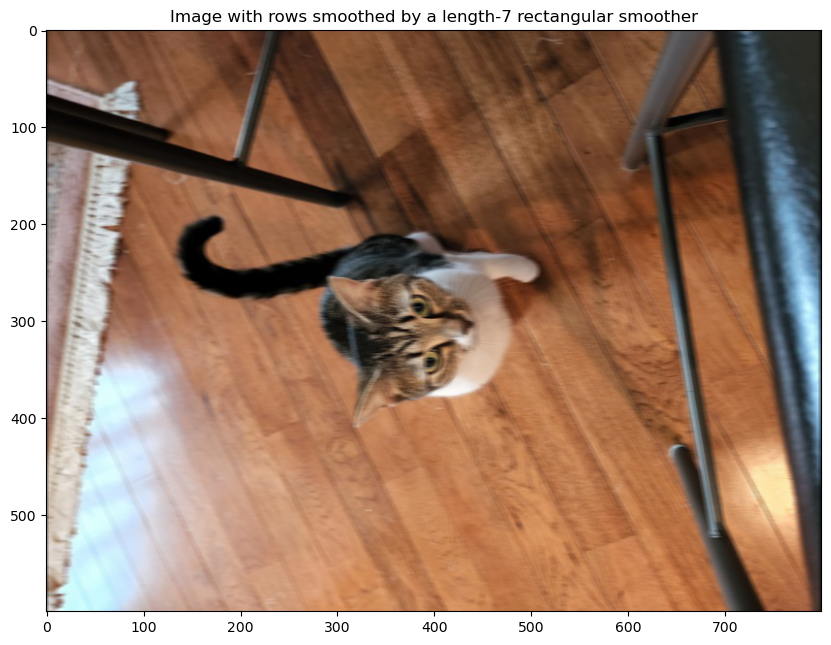

In [8]:
importlib.reload(submitted)
smoothed_rows = submitted.todo_convolve_rows(original, h_rect)
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
ax.clear()
ax.imshow(smoothed_rows.astype(int))
ax.set_title('Image with rows smoothed by a length-7 rectangular smoother')


## Part 3: Use h_rect to smooth the columns of the image

In [9]:
importlib.reload(submitted)
help(submitted.todo_convolve_columns)

Help on function todo_convolve_columns in module submitted:

todo_convolve_columns(X, h)
    Convolve Y=X*h along the columns.
    Use mode='same', so that the output, Y, has the same size as X.



Text(0.5, 1.0, 'Image with both rows and columns smoothed by a length-7 rectangle')

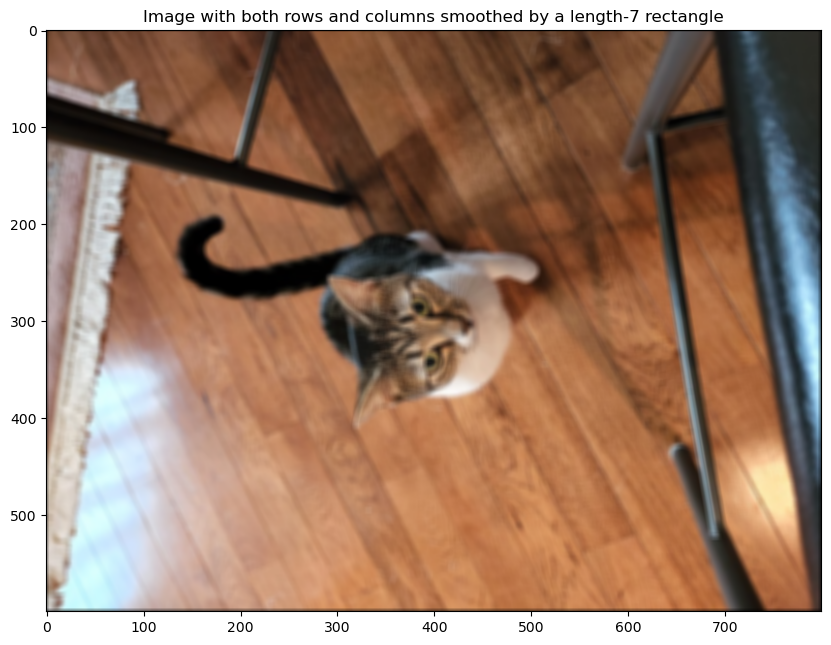

In [10]:
importlib.reload(submitted)
smoothed_image = submitted.todo_convolve_columns(smoothed_rows, h_rect)
fig = plt.figure(figsize=(10,8))
ax = fig.subplots()
ax.clear()
ax.imshow(smoothed_image.astype(int))
ax.set_title('Image with both rows and columns smoothed by a length-7 rectangle')


## Step 4: create a backward-difference filter, and show it in a plot

In [11]:
importlib.reload(submitted)
help(submitted.todo_backward_difference)

Help on function todo_backward_difference in module submitted:

todo_backward_difference()
    Create 11 samples of a backward difference filter, h[n],
    such that the convolution y=x*h gives, as output, y[n]=x[n]-x[n-1].
    Note that you'll need to set h[n]=0 for most n; only a couple of
    samples will be nonzero.
    Return the n_array and the h_array.



Text(0.5, 1.0, 'Differenced Unit step')

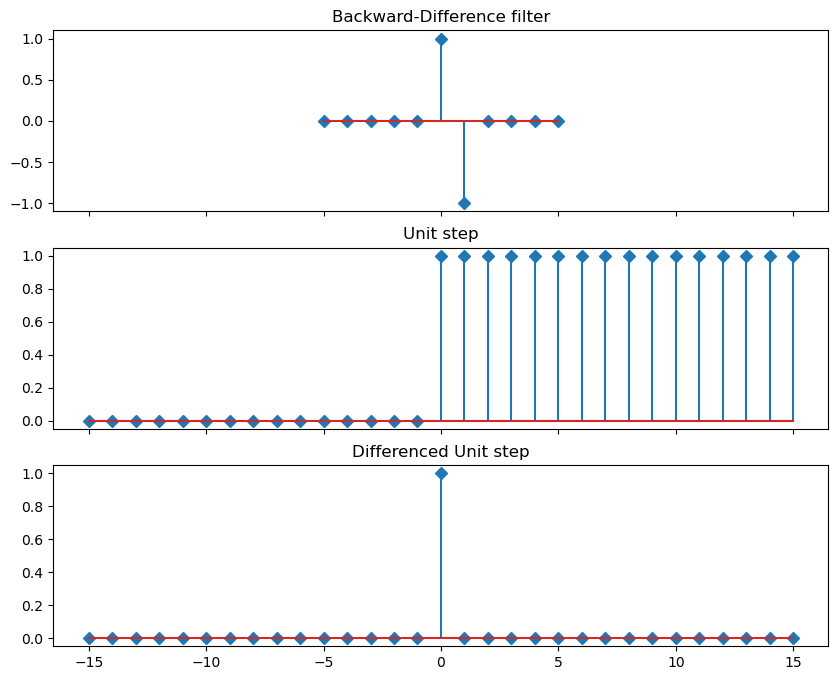

In [12]:
importlib.reload(submitted)
(n_diff, h_diff) = submitted.todo_backward_difference()
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(3,1,sharex=True)
axs[0].stem(n_diff, h_diff, markerfmt='D')
axs[0].set_title('Backward-Difference filter')
(n_step, x_step) = submitted.unit_step()
axs[1].stem(n_step, x_step, markerfmt='D')
axs[1].set_title('Unit step')
y_step = np.convolve(x_step, h_diff, mode='same')
axs[2].stem(n_step, y_step, markerfmt='D')
axs[2].set_title('Differenced Unit step')


## Step 5: create a Gaussian smoothing filter, and show it in a plot

In [13]:
importlib.reload(submitted)
help(submitted.todo_gaussian_smoother)

Help on function todo_gaussian_smoother in module submitted:

todo_gaussian_smoother(stdev=1)
    Create 11 samples of a Gaussian filter with a standard deviation of stdev.
    You might want to call the function gaussian(), which is defined at the
    top of this file.
    Return the n_array and the h_array.



Text(0.5, 1.0, 'Gaussian-smoothed Unit step')

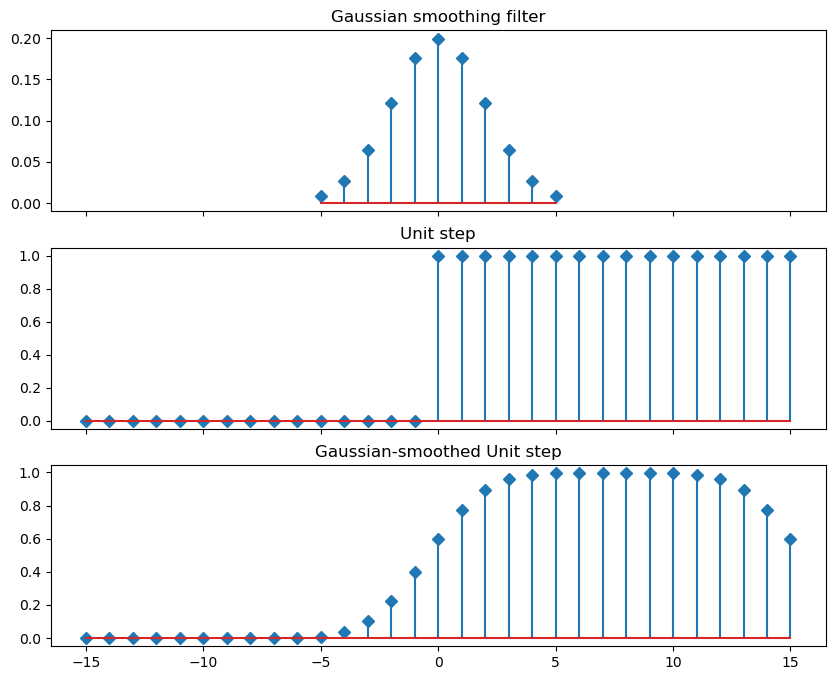

In [14]:
importlib.reload(submitted)
stdev = 2
(n_gauss, h_gauss) = submitted.todo_gaussian_smoother(stdev)
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(3,1,sharex=True)
axs[0].stem(n_gauss, h_gauss, markerfmt='D')
axs[0].set_title('Gaussian smoothing filter')
(n_step, x_step) = submitted.unit_step()
axs[1].stem(n_step, x_step, markerfmt='D')
axs[1].set_title('Unit step')
y_step = np.convolve(x_step, h_gauss, mode='same')
axs[2].stem(n_step, y_step, markerfmt='D')
axs[2].set_title('Gaussian-smoothed Unit step')


Text(0.5, 1.0, 'Image with rows smoothed by stdev=2 Gaussian smoother')

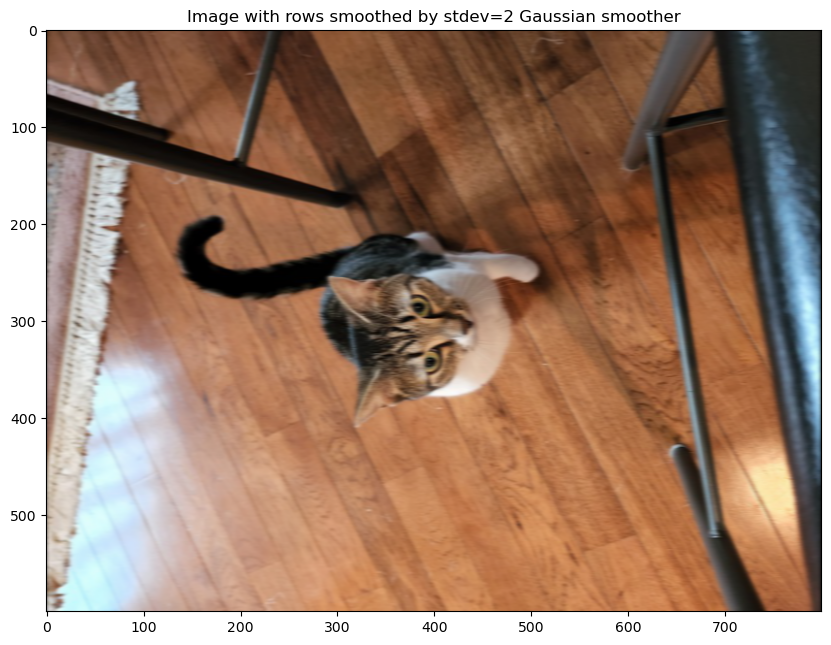

In [15]:
importlib.reload(submitted)
smoothed_rows = submitted.todo_convolve_rows(original, h_gauss)
smoothed_image = submitted.todo_convolve_columns(smoothed_rows, h_gauss)
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()
ax.clear()
ax.imshow(smoothed_rows.astype(int))
ax.set_title('Image with rows smoothed by stdev=%g Gaussian smoother'%(stdev))


## Step 6: create a difference-of-Gaussians filter, and show it in a plot

In [16]:
importlib.reload(submitted)
help(submitted.todo_difference_of_gaussians)

Help on function todo_difference_of_gaussians in module submitted:

todo_difference_of_gaussians()
    Create 11 samples of a difference-of-Gaussians filter, h[n] is the
    difference between a unit-variance Gaussian centered at mu=0,
    minus a unit-variance Gaussian centered at mu=1.
    Return the n_array and the h_array.



Text(0.5, 1.0, 'DoG-filtered Unit step')

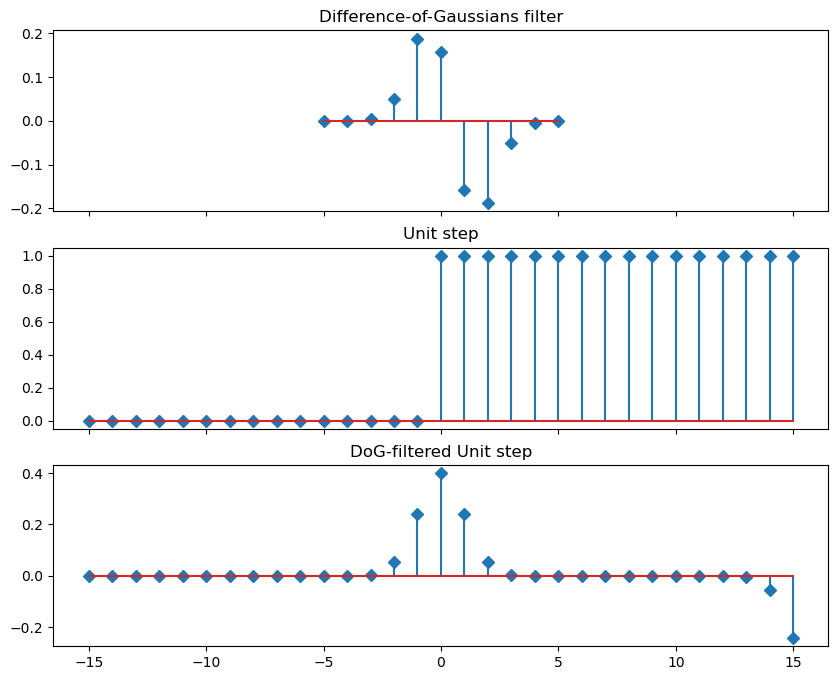

In [17]:
importlib.reload(submitted)
(n_dog, h_dog) = submitted.todo_difference_of_gaussians()
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(3,1,sharex=True)
axs[0].stem(n_dog, h_dog, markerfmt='D')
axs[0].set_title('Difference-of-Gaussians filter')
(n_step, x_step) = submitted.unit_step()
axs[1].stem(n_step, x_step, markerfmt='D')
axs[1].set_title('Unit step')
y_step = np.convolve(x_step, h_dog, mode='same')
axs[2].stem(n_step, y_step, markerfmt='D')
axs[2].set_title('DoG-filtered Unit step')


## Step 7: Use DoG filter to compute Gx and Gy, then normalize

In [18]:
importlib.reload(submitted)
help(submitted.todo_normalize_colors)

Help on function todo_normalize_colors in module submitted:

todo_normalize_colors(X)
    Normalize the color planes of the image, so that
    each color plane has a maximum value of 1.0, and a minimum value of 0.0.



Text(0.5, 1.0, 'Vertical grad magnitude')

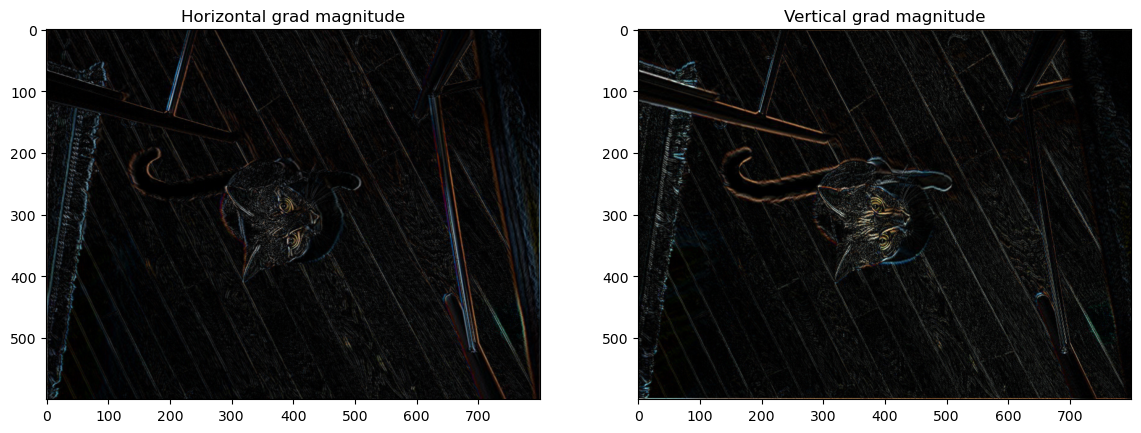

In [19]:
importlib.reload(submitted)
tmp = submitted.todo_convolve_rows(original, h_dog)
hgrad = submitted.todo_normalize_colors(np.abs(tmp))
tmp = submitted.todo_convolve_columns(original, h_dog)
vgrad = submitted.todo_normalize_colors(np.abs(tmp))
fig = plt.figure(figsize=(14,8))
axs = fig.subplots(1,2)
axs[0].imshow(hgrad)
axs[0].set_title('Horizontal grad magnitude')
axs[1].imshow(vgrad)
axs[1].set_title('Vertical grad magnitude')


## Step 8: Gradient magnitude

In [20]:
importlib.reload(submitted)
help(submitted.todo_gradient_magnitude)

Help on function todo_gradient_magnitude in module submitted:

todo_gradient_magnitude(GH, GV)
    Given the horizontal gradient GH and vertical gradient GV,
    compute and return the gradient magnitude GM=sqrt(GH**2 + GV**2)



Text(0.5, 1.0, 'Gradient magnitude')

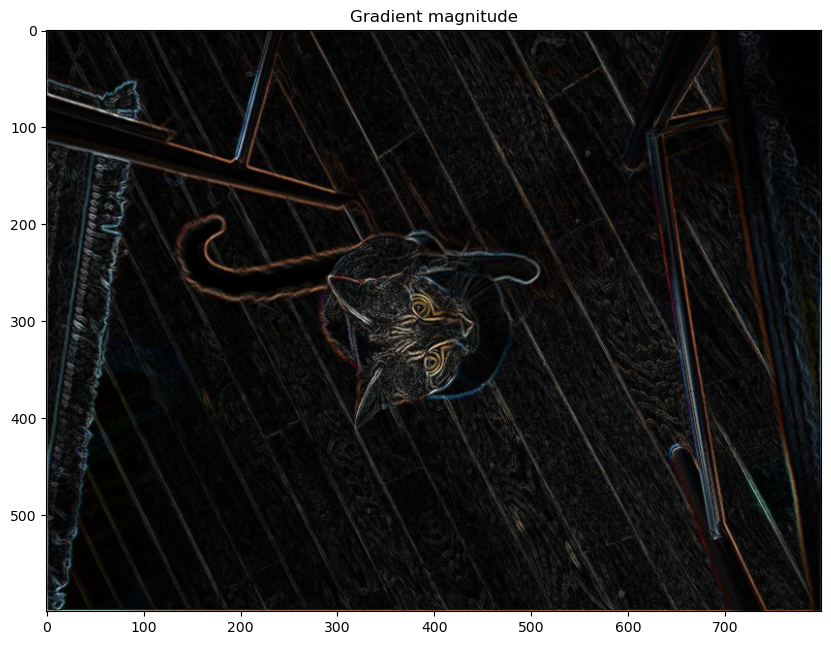

In [21]:
importlib.reload(submitted)
tmp = submitted.todo_gradient_magnitude(hgrad, vgrad)        
gradient_magnitude = submitted.todo_normalize_colors(tmp)
fig = plt.figure(figsize=(10,8))
ax = fig.subplots()
ax.imshow(gradient_magnitude)
ax.set_title('Gradient magnitude')


# Extra Credit

For extra credit, you can create an image pyramid.

In an image pyramid, each image is a smoothed and downsampled version of the previous image.

In [22]:
import extra

In [23]:
importlib.reload(extra)
help(extra.todo_pyramid)

Help on function todo_pyramid in module extra:

todo_pyramid(img, pyramid_length=3, stdev=1)
    img_pyramid = extra.todo_pyramid(img, pyramid_length, stdev)
    Parameters:
    img (numpy array, nrows*ncolumns*ncolors, float64): an img
    steps (scalar int): the number of steps in the pyramid to return
    stdev (scalar float): standard deviation of the Gaussian smoother to use
    
    Return:
    img_pyramid: a list, len(img_pyramid)==pyramid_length
    
    An img pyramid is a list of images, each of which is a smoothed and downsampled
    version of the image that came before it.
    
    img_pyramid[0]: a numpy array, int(nrows/2)*int(ncolumns/2)*ncolors:
       the input img is first smoothed by a Gaussian smoother in both rows and columns,
       then downsampled by a factor of two (keep only the even-numbered rows and columns).
    img_pyramid[1]: a numpy array, int(nrows/4)*int(ncolumns/4)*ncolors:
       img_pyramid[0] is first smoothed by a Gaussian smoother in both rows a

In [24]:
importlib.reload(extra)
image_pyramid = extra.todo_pyramid(original,3,np.sqrt(2))
print('image_pyramid contains %d images'%(len(image_pyramid)))
print('The original image has a size of',original.shape)
for n in range(3):
    print('image_pyramid[%d] has a shape of'%(n), image_pyramid[n].shape)

image_pyramid contains 3 images
The original image has a size of (600, 800, 3)
image_pyramid[0] has a shape of (300, 400, 3)
image_pyramid[1] has a shape of (150, 200, 3)
image_pyramid[2] has a shape of (75, 100, 3)


Text(0.5, 1.0, 'image_pyramid[2]')

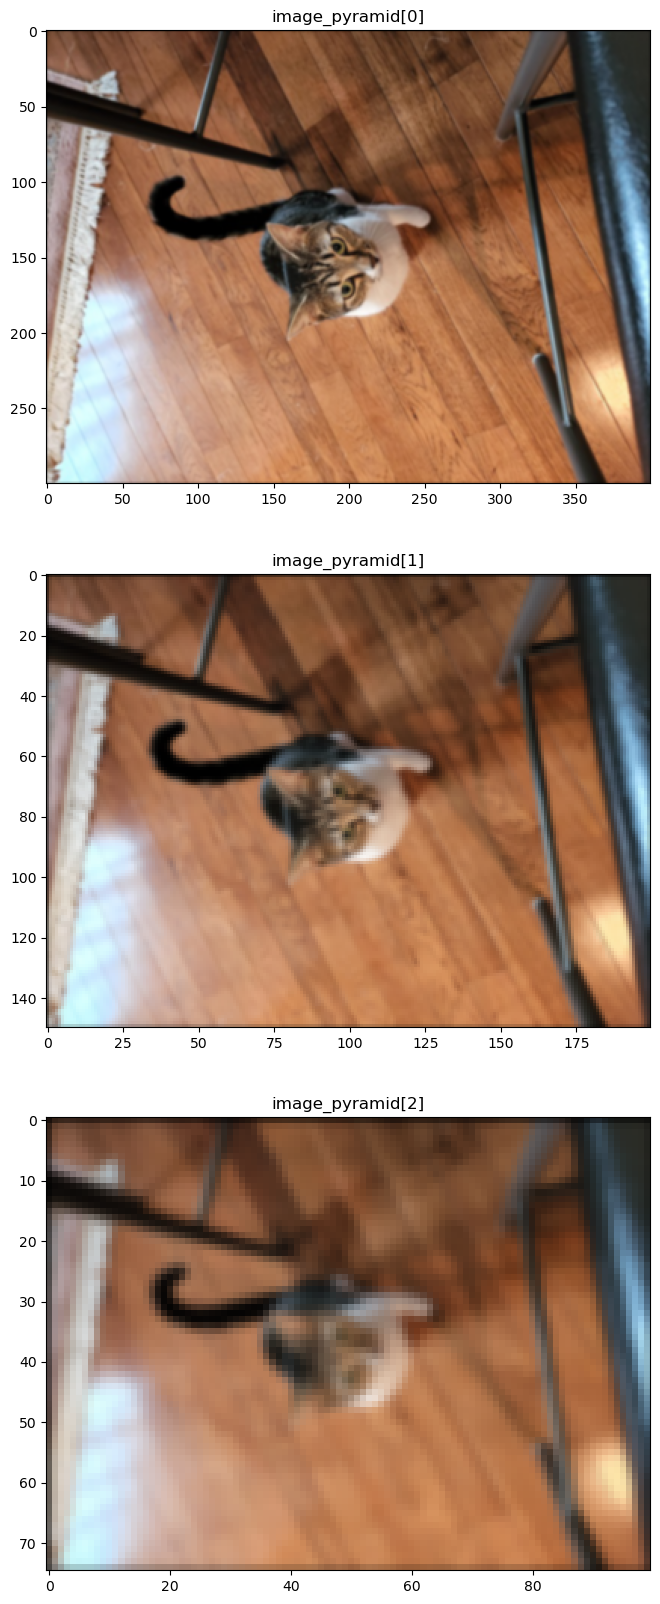

In [25]:
fig = plt.figure(figsize=(10,20))
axs = fig.subplots(3,1)
axs[0].imshow(image_pyramid[0].astype('int'))
axs[0].set_title('image_pyramid[0]')
axs[1].imshow(image_pyramid[1].astype('int'))
axs[1].set_title('image_pyramid[1]')
axs[2].imshow(image_pyramid[2].astype('int'))
axs[2].set_title('image_pyramid[2]')
